In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm # Color maps
from projFuncs import *
from processImg import *
import PIL
from PIL import Image as Im

In [79]:
### Using geometrized units; c=G=1.

pixel_length = 100
x1 = -19 # location of where we observe the final image
x2 = 20 # location of the initial image. Keep it a positive number and the final image at a negative location for later parts of this program to work.

In [80]:
# set image position(s)
initialImage = imageTakeInner('pixil-frame-0.png')
finalImage = np.zeros(initialImage.shape,dtype="int")
y_size, z_size, x_size = initialImage.shape
y_positions = np.arange(0, y_size, 1)
z_positions = np.arange(0, z_size, 1)
y_positions = pixel_length*(y_positions - y_size/2)
z_positions = pixel_length*(z_positions - z_size/2)
y_center = pixel_length*y_size/2
z_center = pixel_length*z_size/2

In [85]:
print("Started.")
for i in range(y_size):
    for j in range(z_size):
        z = z_positions[j]
        y = y_positions[i]
        x = x1
        vx = 1
        vy = 0
        vz = 0
        u = integrate_EOM(np.array([x,y,z]), np.array([vx,vy,vz]),1,np.array([20,101,101]))
        #Upu = u[1:,-2] # penultimate
        Uu = u[1:,-1,0] # ultimate
        if ((Uu[0] - x2) >= 0):
            k,l = findPixel(y_center, z_center, x2, pixel_length, Uu[:3], Uu[3:])
            if ((k > -1) and (k < y_size) and (l > -1) and (l < z_size)):
                finalImage[i,j,:] = initialImage[k,l,:]
print("Finished.")

Started.
Finished.


In [75]:
np.max(finalImage)

255.0

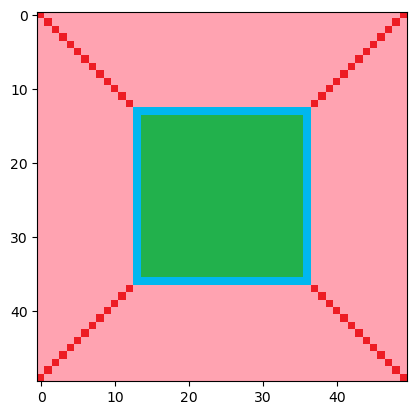

In [72]:
plt.imshow(initialImage)

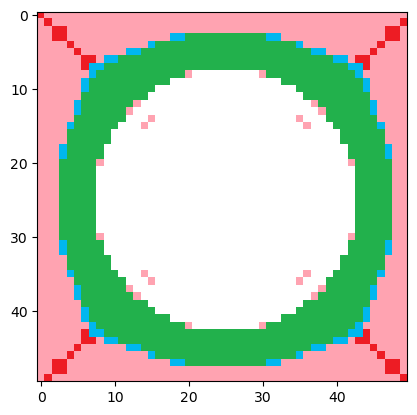

In [86]:
plt.imshow(finalImage)

In [61]:
u = integrate_EOM(np.array([x1,10,10]), np.array([1,0,0]),traj=1)

In [62]:
u.shape

(7, 2, 1)

In [87]:
outputImage = Im.fromarray(finalImage)

TypeError: Cannot handle this data type: (1, 1, 4), <i4